In [ ]:
# Tactical Analysis of Space Utilization and Team Structure
**Match:** France vs Croatia — FIFA World Cup 2018 Final

This notebook analyzes how France structured its spatial occupation and passing behavior
to control the match and progress the ball effectively.


In [ ]:
## Context

In professional football, large volumes of analytical data are often difficult
to communicate effectively to coaching staff. This notebook illustrates how
generative AI can act as an interpretation layer, transforming analytical outputs
into tactical insights that support decision-making.


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
file_path = "/content/events.json"

with open(file_path, "r", encoding="utf-8") as f:
    events = json.load(f)

df = pd.json_normalize(events)
df.head()


,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,pass.deflected,dribble.overrun,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name
0,4a44199a-3111-4e28-b567-9c1393e68dff,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2137ed27-042c-4d73-877c-75d04406617c,2,1,00:00:00.000,0,0,1,1.412,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,531c8cbd-7a3e-4e46-91c1-549a98c27bcb,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9b9060d4-13a5-4a44-aafa-2221ed10a8bc,4,1,00:00:00.000,0,0,1,0.000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6d7450f7-2590-4b04-a2ae-9ed11602e342,5,1,00:00:00.400,0,0,2,1.159,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["type.name"].value_counts().head(10)


,count
type.name,
Pass,846
Ball Receipt*,747
Carry,617
Pressure,254
Ball Recovery,88
Duel,53
Clearance,37
Camera On,34
Miscontrol,33


In [ ]:
passes = df[df["type.name"] == "Pass"].copy()
passes = passes.dropna(subset=["location", "pass.end_location"])
passes.head()


,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,pass.deflected,dribble.overrun,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name
4,6d7450f7-2590-4b04-a2ae-9ed11602e342,5,1,00:00:00.400,0,0,2,1.159,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,d304b712-3d28-4117-aeaf-11c15a36587c,8,1,00:00:02.347,0,2,2,0.773,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,a29c5a6c-6b85-409e-a43b-03f2d6bd3bf2,12,1,00:00:03.947,0,3,2,1.253,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,f763b318-a8a2-407f-a6c5-6b5fa9de3989,16,1,00:00:06.240,0,6,2,2.667,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,e4db1861-af61-4f2b-a8d3-cc117b30845c,21,1,00:00:09.400,0,9,2,4.227,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
france_passes = passes[passes["team.name"] == "France"]
len(france_passes)


292

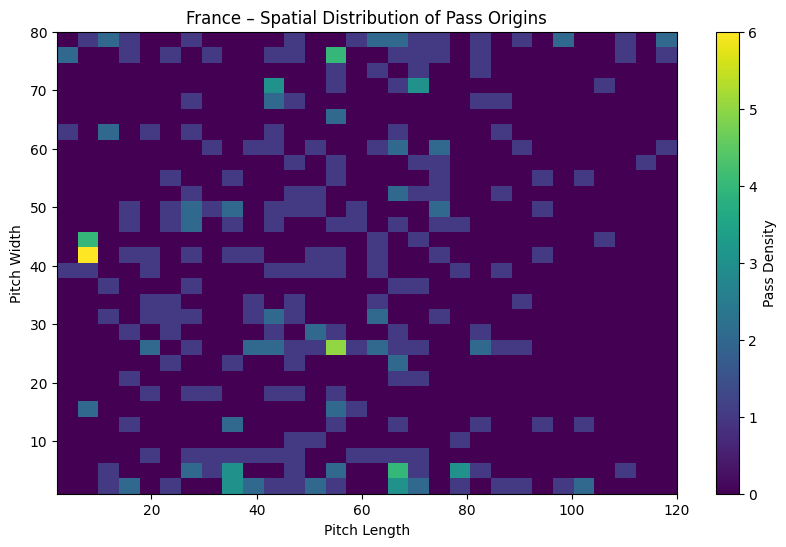

In [ ]:
x = france_passes["location"].apply(lambda l: l[0])
y = france_passes["location"].apply(lambda l: l[1])

plt.figure(figsize=(10,6))
plt.hist2d(x, y, bins=30)
plt.colorbar(label="Pass Density")
plt.title("France – Spatial Distribution of Pass Origins")
plt.xlabel("Pitch Length")
plt.ylabel("Pitch Width")
plt.show()


In [ ]:
### Tactical Insight

France displayed a compact central structure with a bias toward the right half-space.
This spatial discipline enabled controlled progression while maintaining defensive stability,
highlighting a pragmatic possession strategy rather than aggressive wide expansion.


In [ ]:
import networkx as nx


In [ ]:
france_passes_simple = france_passes[
    france_passes["pass.recipient.name"].notna()
][["player.name", "pass.recipient.name"]]

france_passes_simple.head()



,player.name,pass.recipient.name
65,Benjamin Pavard,N''Golo Kanté
69,N''Golo Kanté,Paul Pogba
77,Antoine Griezmann,Kylian Mbappé Lottin
83,Benjamin Pavard,Raphaël Varane
86,Raphaël Varane,Hugo Lloris


In [ ]:
pass_counts = (
    france_passes_simple
    .groupby(["player.name", "pass.recipient.name"])
    .size()
    .reset_index(name="count")
)

pass_counts.head()


,player.name,pass.recipient.name,count
0,Antoine Griezmann,Benjamin Pavard,1
1,Antoine Griezmann,Blaise Matuidi,4
2,Antoine Griezmann,Corentin Tolisso,3
3,Antoine Griezmann,Kylian Mbappé Lottin,3
4,Antoine Griezmann,Lucas Hernández Pi,3


In [ ]:
G = nx.DiGraph()

for _, row in pass_counts.iterrows():
    G.add_edge(
        row["player.name"],
        row["pass.recipient.name"],
        weight=row["count"]
    )


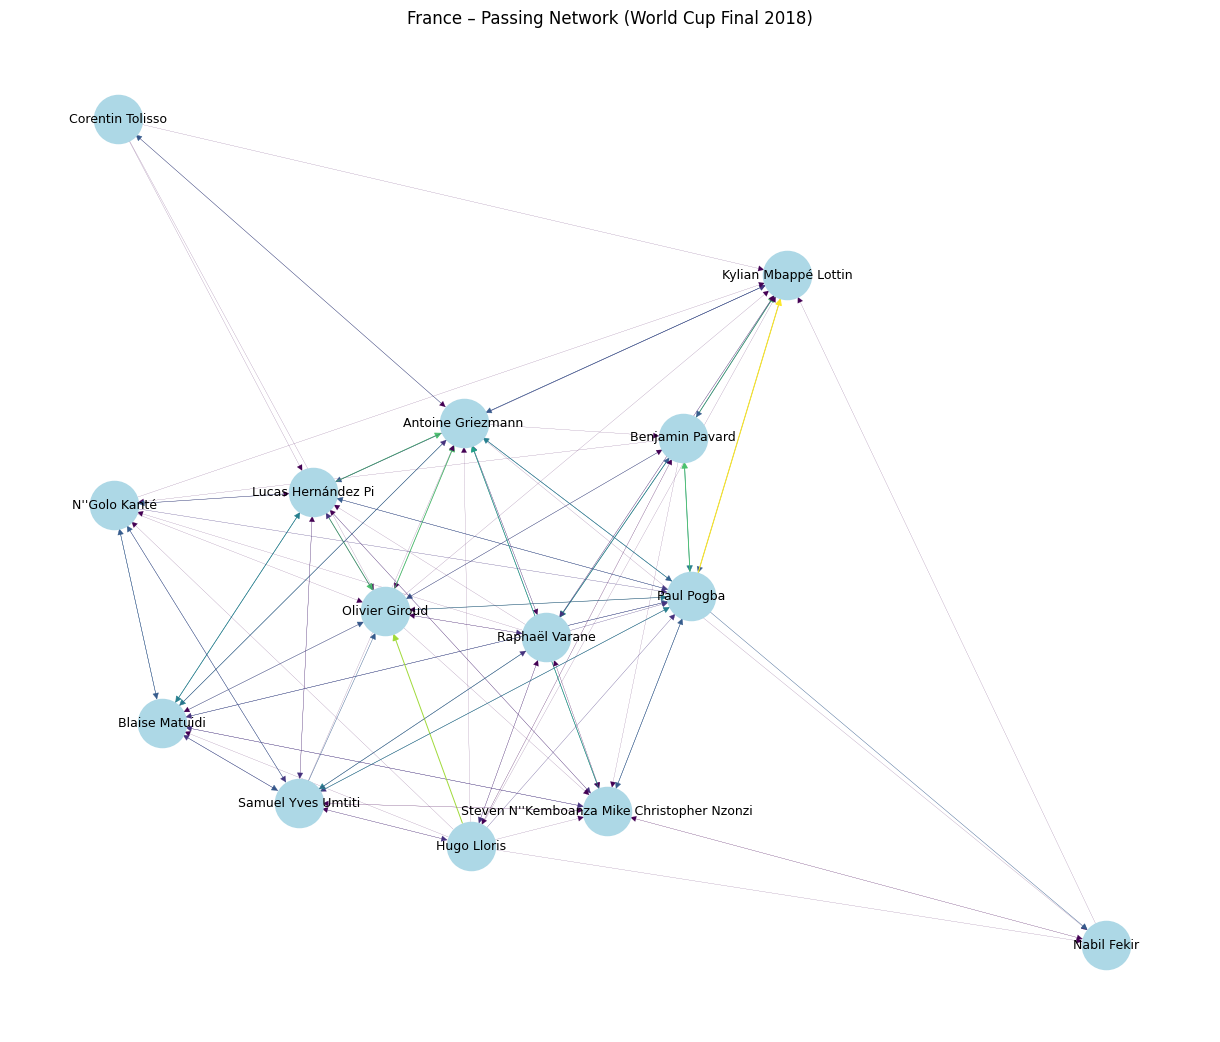

In [ ]:
plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G, k=0.6, seed=42)

edges = G.edges()
weights = [G[u][v]["weight"] for u, v in edges]

nx.draw(
    G, pos,
    with_labels=True,
    node_size=1200,
    node_color="lightblue",
    edge_color=weights,
    width=[w * 0.1 for w in weights],
    font_size=9
)

plt.title("France – Passing Network (World Cup Final 2018)")
plt.show()


In [ ]:
## Passing Network Insight

France’s passing network reveals a centralized structure with midfield players acting as key hubs.
This configuration supports controlled ball circulation and reduces turnover risk,
allowing France to manage tempo and maintain defensive balance.


In [ ]:
## Conclusion

This prototype highlights the potential of generative AI to enhance the
interpretation and communication of football analytics. By focusing on clarity
and tactical relevance, such systems can support analysts and coaches in
understanding game dynamics more efficiently.
